In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)
df = pd.read_parquet('./Data/draft1322')
df

,Draft_Yr,Rnd,Pick,Tm,Player,Pos,Age,To,College,Player_NFL_Link,Player_NCAA_Link,tackles_solo,tackles_assists,tackles_total,tackles_loss,sacks,def_int,def_int_yds,def_int_yds_per_int,def_int_td,pass_defended,fumbles_rec,fumbles_rec_yds,fumbles_rec_td,fumbles_forced,rec,rec_yds,rec_yds_per_rec,rec_td,rush_att,rush_yds,rush_yds_per_att,rush_td,scrim_att,scrim_yds,scrim_yds_per_att,scrim_td,pass_cmp,pass_att,pass_cmp_pct,pass_yds,pass_yds_per_att,adj_pass_yds_per_att,pass_td,pass_int,pass_rating,display_name,position_group,height,weight,entry_year,college_conference,draft_number
0,2013.0,1.0,1.0,KAN,Eric Fisher,OL,22.0,2021.0,Central Michigan,/players/F/FishEr00.htm,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eric Fisher,OL,6-7,315,2013.0,Mid-American Conference,1.0
1,2013.0,1.0,2.0,JAX,Luke Joeckel,OL,21.0,2017.0,Texas A&M,/players/J/JoecLu00.htm,http://www.sports-reference.com/cfb/players/lu...,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Luke Joeckel,OL,6-6,307,2013.0,Southeastern Conference,2.0
2,2013.0,1.0,3.0,MIA,Dion Jordan,DE,23.0,2020.0,Oregon,/players/J/JordDi00.htm,http://www.sports-reference.com/cfb/players/di...,73.0,48.0,121.0,29.0,14.5,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dion Jordan,DL,6-6,275,2013.0,Pacific Twelve Conference,3.0
3,2013.0,1.0,4.0,PHI,Lane Johnson,OL,23.0,2022.0,Oklahoma,/players/J/JohnLa01.htm,http://www.sports-reference.com/cfb/players/la...,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lane Johnson,OL,6-6,317,2013.0,Big Twelve Conference,4.0
4,2013.0,1.0,5.0,DET,Ezekiel Ansah,DE,24.0,2020.0,BYU,/players/A/AnsaEz00.htm,http://www.sports-reference.com/cfb/players/ez...,39.0,33.0,72.0,13.0,4.5,1.0,-2.0,-2.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ezekiel Ansah,DL,6-5,275,2013.0,Independent,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,2022.0,0.0,258.0,GNB,Samori Toure,WR,24.0,2022.0,Nebraska,/players/T/TourSa00.htm,http://www.sports-reference.com/cfb/players/sa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,898.0,19.5,5.0,8.0,63.0,7.9,1.0,54.0,961.0,17.8,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Samori Toure,WR,6-3,190,2022.0,Big Ten Conference,258.0
2554,2022.0,0.0,259.0,KAN,Nazeeh Johnson,S,24.0,2022.0,Marshall,/players/J/JohnNa01.htm,http://www.sports-reference.com/cfb/players/na...,177.0,125.0,302.0,6.0,1.0,7.0,63.0,9.0,1.0,19.0,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nazeeh Johnson,DB,6-2,189,2022.0,Conference USA,259.0
2555,2022.0,0.0,260.0,LAC,Zander Horvath,RB,23.0,2022.0,Purdue,/players/H/HorvZa00.htm,http://www.sports-reference.com/cfb/players/al...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,592.0,8.7,1.0,268.0,1181.0,4.4,8.0,336.0,1773.0,5.3,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zander Horvath,RB,6-3,230,2022.0,Big Ten Conference,260.0
2556,2022.0,0.0,261.0,LAR,AJ Arcuri,OL,25.0,2022.0,Michigan St.,/players/A/ArcuAJ00.htm,http://www.sports-reference.com/cfb/players/aj...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,NaN


In [3]:
first = df[df.Rnd == 1]
other = df[df.Rnd != 1]

In [4]:
first_pos = pd.DataFrame(first.Pos.value_counts()).reset_index()
first_conf = pd.DataFrame(first.college_conference.value_counts()).reset_index()

In [5]:
other_pos = pd.DataFrame(other.Pos.value_counts()).reset_index()
other_conf = pd.DataFrame(other.college_conference.value_counts()).reset_index()

In [6]:
first_pos.columns=['f_pos','f_pos_Count']
first_conf.columns=['f_conf','f_conf_Count']
other_pos.columns=['o_pos','o_pos_Count']
other_conf.columns=['o_conf','o_conf_Count']

In [7]:
first_pos_cols = []
missing_pos_cols = []
for x in first_pos.f_pos:
    first_pos_cols.append(x)
for y in other_pos.o_pos:
    if y not in first_pos_cols:
        missing_pos_cols.append(y)

first_conf_cols = []
missing_conf_cols = []
for a in first_conf.f_conf:
    first_conf_cols.append(a)
for b in other_conf.o_conf:
    if b not in first_conf_cols:
        missing_conf_cols.append(b)

In [8]:
add_pos = pd.DataFrame({'f_pos': missing_pos_cols,
              'f_pos_Count': [0,0,0,0]})

In [9]:
zero = []
for i in range(len(missing_conf_cols)):
    zero.append(0)

In [10]:
add_conf = pd.DataFrame({'f_conf': missing_conf_cols,
                        'f_conf_Count': zero})

In [11]:
first_pos = pd.concat([first_pos,add_pos]).reset_index().drop(['index'],axis=1)
first_conf = pd.concat([first_conf,add_conf]).reset_index().drop(['index'],axis=1)

In [12]:
com_pos = first_pos.merge(other_pos,left_on='f_pos',right_on='o_pos',indicator='outer')
com_conf = first_conf.merge(other_conf,left_on='f_conf',right_on='o_conf',indicator='outer')

In [13]:
com_pos.drop(['outer'],axis=1,inplace=True)
com_conf.drop(['outer'],axis=1,inplace=True)

In [14]:
com_pos['ratio'] = com_pos.f_pos_Count / (com_pos.f_pos_Count + com_pos.o_pos_Count)
com_conf['ratio'] = com_conf.f_conf_Count / (com_conf.f_conf_Count + com_conf.o_conf_Count)

In [15]:
com_pos.sort_values(by='ratio',ascending=False)

,f_pos,f_pos_Count,o_pos,o_pos_Count,ratio
4,QB,30,QB,83,0.265487
0,OL,63,OL,363,0.147887
3,DE,31,DE,192,0.139013
6,DT,26,DT,165,0.136126
5,CB,28,CB,182,0.133333
7,DB,23,DB,150,0.132948
1,WR,42,WR,277,0.131661
2,LB,40,LB,280,0.125000
11,DL,3,DL,24,0.111111
9,S,12,S,126,0.086957


In [49]:
com_conf.sort_values(by='ratio',ascending=False).head(14)

,f_conf,f_conf_Count,o_conf,o_conf_Count,ratio
0,Southeastern Conference,99,Southeastern Conference,422,0.190019
6,Independent,10,Independent,50,0.166667
1,Atlantic Coast Conference,51,Atlantic Coast Conference,267,0.160377
3,Pacific Twelve Conference,43,Pacific Twelve Conference,246,0.148789
2,Big Ten Conference,46,Big Ten Conference,302,0.132184
12,Southwestern Athletic Conference,1,Southwestern Athletic Conference,7,0.125000
5,American Athletic Conference,13,American Athletic Conference,110,0.105691
4,Big Twelve Conference,19,Big Twelve Conference,174,0.098446
10,Missouri Valley Football Conference,3,Missouri Valley Football Conference,28,0.096774
13,Southern Conference,1,Southern Conference,11,0.083333


In [ ]:
df[(df.Player.duplicated())&(df.Player != df.display_name)]

In [ ]:
df[df.Player == 'Artie Burns']

In [71]:
qb = df[df.Pos == 'QB']
ol = df[df.Pos == 'OL']
de = df[df.Pos == 'DE']
dt = df[df.Pos == 'DT']
cb = df[df.Pos == 'CB']
db = df[df.Pos == 'DB']
wr = df[df.Pos == 'WR']

In [19]:
qb.columns

Index(['Draft_Yr', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'To',
       'College', 'Player_NFL_Link', 'Player_NCAA_Link', 'tackles_solo',
       'tackles_assists', 'tackles_total', 'tackles_loss', 'sacks', 'def_int',
       'def_int_yds', 'def_int_yds_per_int', 'def_int_td', 'pass_defended',
       'fumbles_rec', 'fumbles_rec_yds', 'fumbles_rec_td', 'fumbles_forced',
       'rec', 'rec_yds', 'rec_yds_per_rec', 'rec_td', 'rush_att', 'rush_yds',
       'rush_yds_per_att', 'rush_td', 'scrim_att', 'scrim_yds',
       'scrim_yds_per_att', 'scrim_td', 'pass_cmp', 'pass_att', 'pass_cmp_pct',
       'pass_yds', 'pass_yds_per_att', 'adj_pass_yds_per_att', 'pass_td',
       'pass_int', 'pass_rating', 'display_name', 'position_group', 'height',
       'weight', 'entry_year', 'college_conference', 'draft_number'],
      dtype='object')

In [72]:
qb = qb[['Draft_Yr', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'To',
       'College', 'Player_NFL_Link', 'Player_NCAA_Link', 'pass_cmp', 'pass_att', 'pass_cmp_pct',
       'pass_yds', 'pass_yds_per_att', 'adj_pass_yds_per_att', 'pass_td',
       'pass_int', 'pass_rating', 'display_name', 'position_group', 'height',
       'weight', 'entry_year', 'college_conference', 'draft_number']]

In [73]:
ol = ol[['Draft_Yr', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'To',
       'College', 'Player_NFL_Link', 'Player_NCAA_Link','display_name', 'position_group', 'height',
       'weight', 'entry_year', 'college_conference', 'draft_number']]

In [74]:
de = de[['Draft_Yr', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'To',
       'College', 'Player_NFL_Link', 'Player_NCAA_Link', 'tackles_solo',
       'tackles_assists', 'tackles_total', 'tackles_loss', 'sacks', 'def_int',
       'def_int_yds', 'def_int_yds_per_int', 'def_int_td', 'pass_defended',
       'fumbles_rec', 'fumbles_rec_yds', 'fumbles_rec_td', 'fumbles_forced','display_name', 'position_group', 'height',
       'weight', 'entry_year', 'college_conference', 'draft_number']]

dt = dt[['Draft_Yr', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'To',
       'College', 'Player_NFL_Link', 'Player_NCAA_Link', 'tackles_solo',
       'tackles_assists', 'tackles_total', 'tackles_loss', 'sacks', 'def_int',
       'def_int_yds', 'def_int_yds_per_int', 'def_int_td', 'pass_defended',
       'fumbles_rec', 'fumbles_rec_yds', 'fumbles_rec_td', 'fumbles_forced','display_name', 'position_group', 'height',
       'weight', 'entry_year', 'college_conference', 'draft_number']]

cb = cb[['Draft_Yr', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'To',
       'College', 'Player_NFL_Link', 'Player_NCAA_Link', 'tackles_solo',
       'tackles_assists', 'tackles_total', 'tackles_loss', 'sacks', 'def_int',
       'def_int_yds', 'def_int_yds_per_int', 'def_int_td', 'pass_defended',
       'fumbles_rec', 'fumbles_rec_yds', 'fumbles_rec_td', 'fumbles_forced','display_name', 'position_group', 'height',
       'weight', 'entry_year', 'college_conference', 'draft_number']]

db = db[['Draft_Yr', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'To',
       'College', 'Player_NFL_Link', 'Player_NCAA_Link', 'tackles_solo',
       'tackles_assists', 'tackles_total', 'tackles_loss', 'sacks', 'def_int',
       'def_int_yds', 'def_int_yds_per_int', 'def_int_td', 'pass_defended',
       'fumbles_rec', 'fumbles_rec_yds', 'fumbles_rec_td', 'fumbles_forced','display_name', 'position_group', 'height',
       'weight', 'entry_year', 'college_conference', 'draft_number']]

In [75]:
wr = wr[['Draft_Yr', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'To',
       'College', 'Player_NFL_Link', 'Player_NCAA_Link', 'rec', 'rec_yds', 'rec_yds_per_rec', 'rec_td', 'rush_att', 'rush_yds',
       'rush_yds_per_att', 'rush_td', 'scrim_att', 'scrim_yds',
       'scrim_yds_per_att', 'scrim_td','display_name', 'position_group', 'height',
       'weight', 'entry_year', 'college_conference', 'draft_number']]

In [62]:
ol.groupby(['Rnd','college_conference']).count()

Draft_Yr  Pick  Tm  \
Rnd college_conference                                                     
0.0 American Athletic Conference                            13    13  13   
    Atlantic Coast Conference                               38    38  38   
    Big Sky Conference                                       3     3   3   
    Big Ten Conference                                      54    54  54   
    Big Twelve Conference                                   30    30  30   
    Colonial Athletic Association                            3     3   3   
    Conference USA                                           7     7   7   
    Great Northwest Athletic Conference                      1     1   1   
    Independent                                              6     6   6   
    Ivy League                                               2     2   2   
    Liberty League                                           1     1   1   
    Mid-America Intercollegiate Athletic Association         2     2   2   
    Mid-American Conference                                 11    11  11   
    Mid-Eastern Athletic Conference                          2     2   2   
    Minnesota Intercollegiate Athletic Conference            1     1   1   
    Missouri Valley Football Conference                      5     5   5   
    Mountain West Conference                                15    15  15   
    NO COLLEGE                                               1     1   1   
    Northeast Conference                                     1     1   1   
    Northern Sun Intercollegiate Conference                  1     1   1   
    Ohio Valley Conference                                   5     5   5   
    Pacific Twelve Conference                               38    38  38   
    Patriot League                                           1     1   1   
    Pennsylvania State Athletic Conference                   2     2   2   
    Quebec Student Sports Foundation                         1     1   1   
    Rocky Mountain Athletic Conference                       1     1   1   
    South Atlantic Conference                                1     1   1   
    Southeastern Conference                                 75    75  75   
    Southern Conference                                      2     2   2   
    Southwestern Athletic Conference                         3     3   3   
    Sun Belt Conference                                      6     6   6   
    Western Athletic Conference                              1     1   1   
    Wisconsin Intercollegiate Athletic Conference            1     1   1   
1.0 American Athletic Conference                             1     1   1   
    Atlantic Coast Conference                               10    10  10   
    Big East                                                 1     1   1   
    Big Ten Conference                                      11    11  11   
    Big Twelve Conference                                    1     1   1   
    Independent                                              4     4   4   
    Mid-American Conference                                  1     1   1   
    Missouri Valley Football Conference                      1     1   1   
    Pacific Twelve Conference                               10    10  10   
    Southeastern Conference                                 20    20  20   
    Southern Conference                                      1     1   1   
    Southwestern Athletic Conference                         1     1   1   

                                                      Player  Pos  Age  To  \
Rnd college_conference                                                       
0.0 American Athletic Conference                          13   13   13  10   
    Atlantic Coast Conference                             38   38   38  34   
    Big Sky Conference                                     3    3    3   3   
    Big Ten Conference                                    54   54   54  48   
    Big Twelv

In [23]:
qb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 15 to 2557
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Draft_Yr              113 non-null    float64
 1   Rnd                   113 non-null    float64
 2   Pick                  113 non-null    float64
 3   Tm                    113 non-null    object 
 4   Player                113 non-null    object 
 5   Pos                   113 non-null    object 
 6   Age                   113 non-null    float64
 7   To                    92 non-null     float64
 8   College               113 non-null    object 
 9   Player_NFL_Link       113 non-null    object 
 10  Player_NCAA_Link      108 non-null    object 
 11  pass_cmp              108 non-null    float64
 12  pass_att              108 non-null    float64
 13  pass_cmp_pct          108 non-null    float64
 14  pass_yds              108 non-null    float64
 15  pass_yds_per_att     

In [76]:
qb_num = qb.select_dtypes('float64')

In [27]:
qb_num.columns

Index(['Draft_Yr', 'Rnd', 'Pick', 'Age', 'To', 'pass_cmp', 'pass_att',
       'pass_cmp_pct', 'pass_yds', 'pass_yds_per_att', 'adj_pass_yds_per_att',
       'pass_td', 'pass_int', 'pass_rating', 'entry_year', 'draft_number'],
      dtype='object')

In [77]:
qb_num.drop(['Draft_Yr','Pick','To','entry_year','draft_number'],axis=1,inplace=True)

In [32]:
qb_num

,Rnd,Age,pass_cmp,pass_att,pass_cmp_pct,pass_yds,pass_yds_per_att,adj_pass_yds_per_att,pass_td,pass_int,pass_rating
15,1.0,23.0,600.0,897.0,66.9,7741.0,8.6,8.3,47.0,28.0,150.4
38,0.0,22.0,988.0,1465.0,67.4,11662.0,8.0,8.7,98.0,21.0,153.5
72,0.0,23.0,646.0,1069.0,60.4,7411.0,6.9,6.8,63.0,31.0,132.3
97,0.0,22.0,1001.0,1562.0,64.1,12327.0,7.9,8.0,116.0,48.0,148.7
109,0.0,23.0,791.0,1312.0,60.3,9190.0,7.0,7.1,70.0,28.0,132.5
...,...,...,...,...,...,...,...,...,...,...,...
2432,0.0,23.0,475.0,686.0,69.2,5967.0,8.7,9.8,62.0,11.0,168.9
2439,0.0,21.0,713.0,1117.0,63.8,10283.0,9.2,9.9,92.0,23.0,164.2
2536,0.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2542,0.0,25.0,552.0,885.0,62.4,7124.0,8.0,8.2,42.0,16.0,142.0


In [51]:
qb_num.groupby('Rnd').median()

,Age,pass_cmp,pass_att,pass_cmp_pct,pass_yds,pass_yds_per_att,adj_pass_yds_per_att,pass_td,pass_int,pass_rating
Rnd,,,,,,,,,,
0.0,23.0,647.0,1021.0,62.45,8339.5,7.90,8.20,63.0,23.0,144.45
1.0,22.0,609.5,901.5,66.30,8082.5,8.55,8.85,61.5,21.5,157.35


In [78]:
de_num = de.select_dtypes('float64')

In [79]:
de_num.drop(['Draft_Yr','Pick','To','entry_year','draft_number'],axis=1,inplace=True)

<AxesSubplot:>

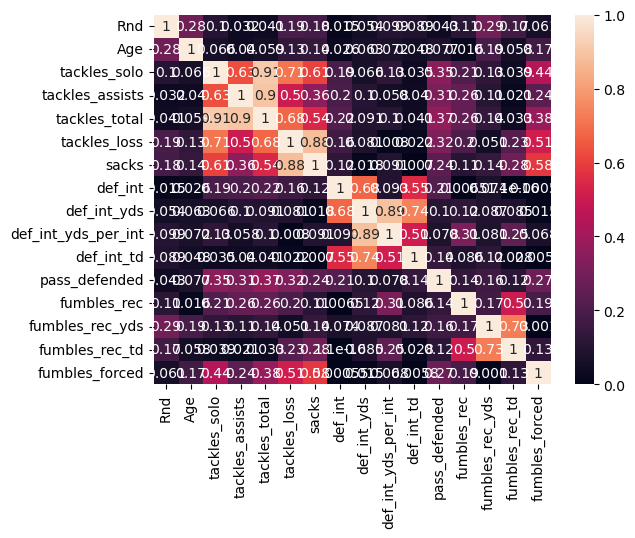

In [80]:
sns.heatmap(de_num.corr().abs(),annot=True)

In [81]:
de_num.groupby('Rnd').median()

,Age,tackles_solo,tackles_assists,tackles_total,tackles_loss,sacks,def_int,def_int_yds,def_int_yds_per_int,def_int_td,pass_defended,fumbles_rec,fumbles_rec_yds,fumbles_rec_td,fumbles_forced
Rnd,,,,,,,,,,,,,,,
0.0,23.0,64.0,53.0,119.0,26.5,15.0,0.0,0.0,9.0,0.0,4.0,1.0,0.0,0.0,3.0
1.0,22.0,73.0,46.0,121.0,35.0,19.0,0.0,0.0,0.0,0.0,5.0,1.0,4.0,1.0,3.0


<AxesSubplot:>

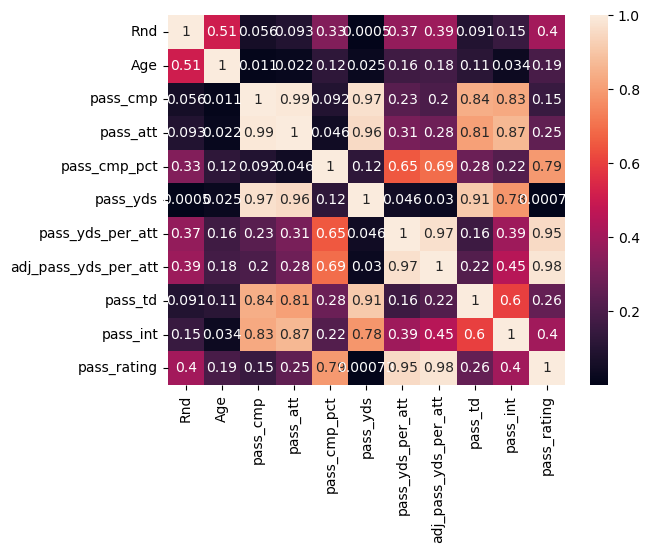

In [35]:
sns.heatmap(qb_num.corr().abs(),annot=True)

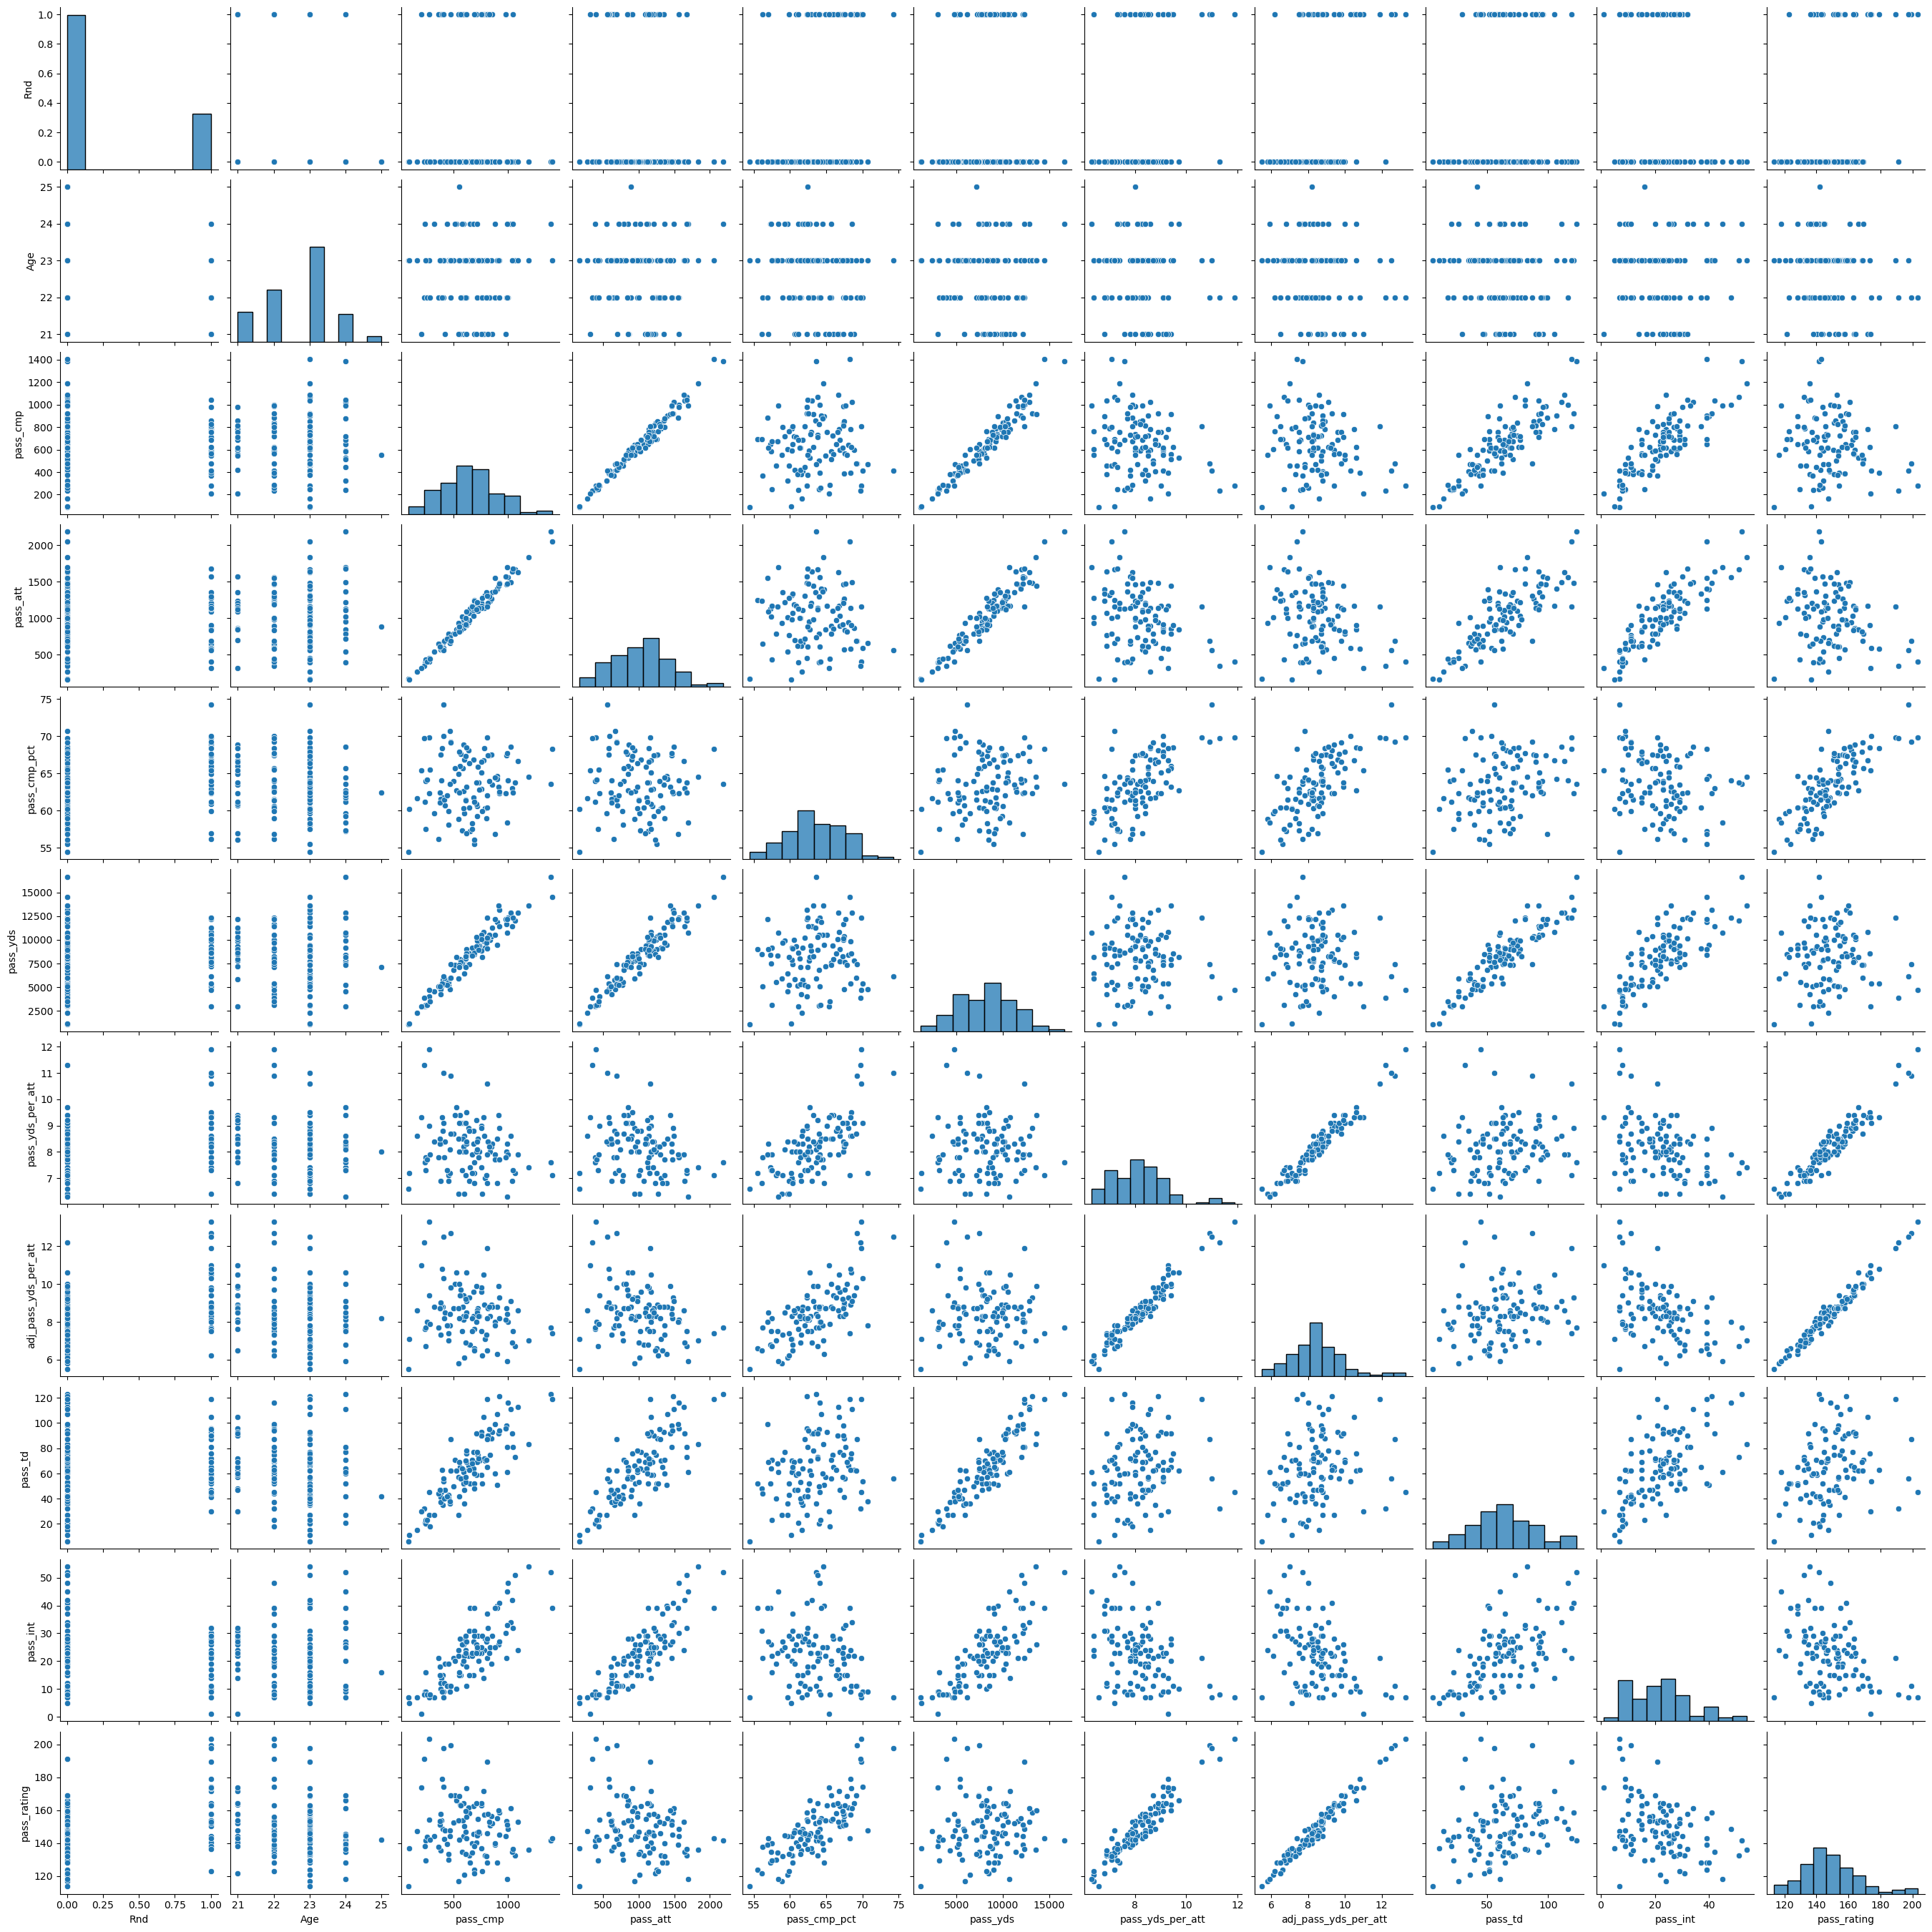

In [36]:
sns.pairplot(qb_num)

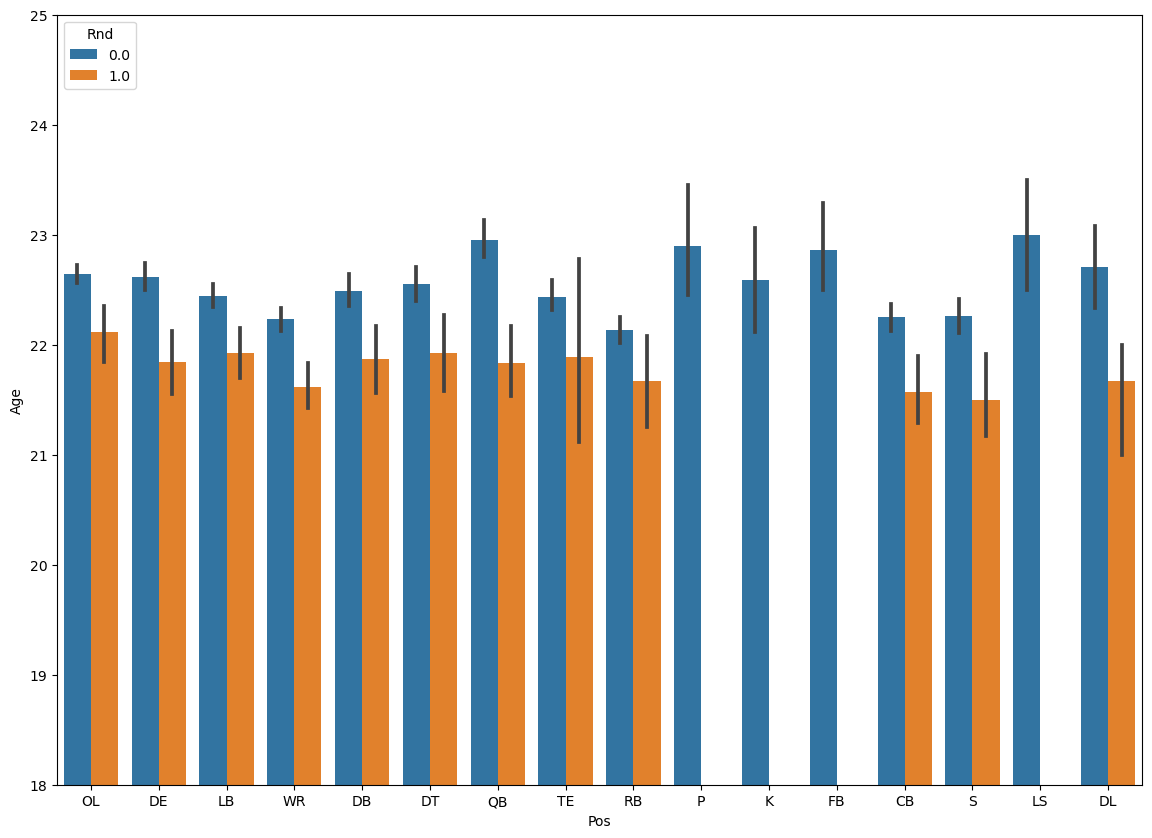

In [48]:
plt.figure(figsize=(14,10))
sns.barplot(x=df.Pos,y=df.Age,hue=df.Rnd)
plt.ylim(18,25);

In [38]:
df.height.value_counts()

6-3     329
6-4     299
6-1     270
6-2     267
6-5     257
6-0     228
5-11    184
6-6     148
5-10    108
6-7      58
5-9      55
5-8      21
6-8      15
77       12
73       11
74       11
75        9
72        8
6-9       5
71        3
70        3
5-7       3
76        2
78        2
5-6       2
69        1
79        1
Name: height, dtype: int64

In [41]:
df.height[df.height.str.contains('-')]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [42]:
df[df.height.isna()]

,Draft_Yr,Rnd,Pick,Tm,Player,Pos,Age,To,College,Player_NFL_Link,Player_NCAA_Link,tackles_solo,tackles_assists,tackles_total,tackles_loss,sacks,def_int,def_int_yds,def_int_yds_per_int,def_int_td,pass_defended,fumbles_rec,fumbles_rec_yds,fumbles_rec_td,fumbles_forced,rec,rec_yds,rec_yds_per_rec,rec_td,rush_att,rush_yds,rush_yds_per_att,rush_td,scrim_att,scrim_yds,scrim_yds_per_att,scrim_td,pass_cmp,pass_att,pass_cmp_pct,pass_yds,pass_yds_per_att,adj_pass_yds_per_att,pass_td,pass_int,pass_rating,display_name,position_group,height,weight,entry_year,college_conference,draft_number
8,2013.0,1.0,9.0,NYJ,Dee Milliner,DB,21.0,2015.0,Alabama,/players/M/MillDe00.htm,http://www.sports-reference.com/cfb/players/de...,55.0,26.0,81.0,5.0,0.0,6.0,107.0,17.8,1.0,17.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,NaN
23,2013.0,1.0,24.0,IND,Bjoern Werner,DE,23.0,2015.0,Florida St.,/players/W/WernBj00.htm,http://www.sports-reference.com/cfb/players/bj...,63.0,36.0,99.0,35.0,23.5,1.0,0.0,0.0,0.0,9.0,1.0,34.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,NaN
31,2013.0,1.0,32.0,BAL,Matt Elam,DB,22.0,2016.0,Florida,/players/E/ElamMa00.htm,http://www.sports-reference.com/cfb/players/ma...,124.0,52.0,176.0,23.5,5.0,6.0,91.0,15.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,NaN
49,2013.0,0.0,50.0,CHI,Jonathan Bostic,LB,22.0,2022.0,Florida,/players/B/BostJo00.htm,http://www.sports-reference.com/cfb/players/jo...,141.0,78.0,219.0,19.0,7.5,5.0,40.0,8.0,1.0,2.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,NaN
57,2013.0,0.0,58.0,DEN,Montee Ball,RB,22.0,2014.0,Wisconsin,/players/B/BallMo00.htm,http://www.sports-reference.com/cfb/players/mo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,598.0,10.1,6.0,924.0,5140.0,5.6,77.0,983.0,5738.0,5.8,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393,2022.0,0.0,98.0,WAS,Brian Robinson Jr.,RB,23.0,2022.0,Alabama,/players/R/RobiBr01.htm,http://www.sports-reference.com/cfb/players/br...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,446.0,8.6,2.0,545.0,2704.0,5.0,29.0,597.0,3150.0,5.3,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,NaN
2462,2022.0,0.0,167.0,DAL,DaRon Bland,DB,23.0,2022.0,Fresno St.,/players/B/BlanDa00.htm,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,NaN
2497,2022.0,0.0,202.0,CLE,Michael Woods II,WR,22.0,2022.0,Oklahoma,/players/W/WoodMi00.htm,http://www.sports-reference.com/cfb/players/mi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,NaN
2534,2022.0,0.0,239.0,IND,Rodney Thomas II,LB,24.0,2022.0,Yale,/players/T/ThomRo07.htm,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,NaN
